In [121]:
# %%writefile Ind_BWMFI_VOL.py

import sys
import os 
module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path)

import Ind_Model_Base

import numpy as np
import pandas as pd

import QUANTAXIS as QA

import matplotlib.pyplot as plt


import Analysis_Funs as af

import talib
# import base.JuUnits as ju

# %load_ext autoreload
# %autoreload 2
# %aimport Analysis_Funs,Ind_Model_Base


class BWMFI(Ind_Model_Base.Ind_Model):
    """ 比尔·威廉姆斯,市场促进指数 (Market Facilitation Index),
        废渣！
    """
    optimum_param={'valid':False, 'main':'BWMFI', 'desition_direct':1, 'freq':'d','neutralize':{'enable':False,'static_mv':False}}
    
    def __init__(self,data, frequence=QA.FREQUENCE.DAY):
        super().__init__(data, 'BWMFI', frequence)
        
        ### 正式使用时由实例设置为true来加速
#         self.set_ignore_sub_ind(False)
        

    def on_set_params_default(self):
        return {'timeperiod':20}
    
        
    def on_indicator_structuring(self, data):
        return self.excute_for_multicode(data, self.kernel, **self.pramas)
    
    def on_desition_structuring(self, data, ind_data):
        """
        """
#         def feature(item_df):
#             direct = np.sign(item_df['K'] - item_df['D'])
#             return -1 * np.abs( af.timeline_event_continuity(direct.fillna(0)) )
# #             return af.timeline_event_continuity(direct.fillna(0))

#         event_continuity = self.excute_for_multicode(self.ind_df,
#                                          lambda x: pd.DataFrame(feature(x),
#                                          index=x.index,
#                                          columns=['feature_SO_CONTINUITY_NEG_ABS']))
#         # event_continuity时防止0干扰
#         event_continuity[event_continuity==0] = np.nan
#         self.ind_df = pd.concat([self.ind_df, event_continuity],axis=1)
        return None# event_continuity
        
    def kernel(self,dataframe, timeperiod):
#         BW MFI = (HIGH - LOW) / VOLUME
        if len(dataframe)<=timeperiod:
            return None
        
        mfi = (dataframe.high-dataframe.low) * dataframe.volume
        mfi.name = 'MFI'
        d = talib.MA(mfi, timeperiod)
        d.name = 'MFIMA'
        
        df = pd.concat([mfi,d], axis=1)
        return df

    def plot(self):
        if self.fast_mode:
            raise 'fast_mode is True,cant draw chart'
        
        


Wall time: 462 ms


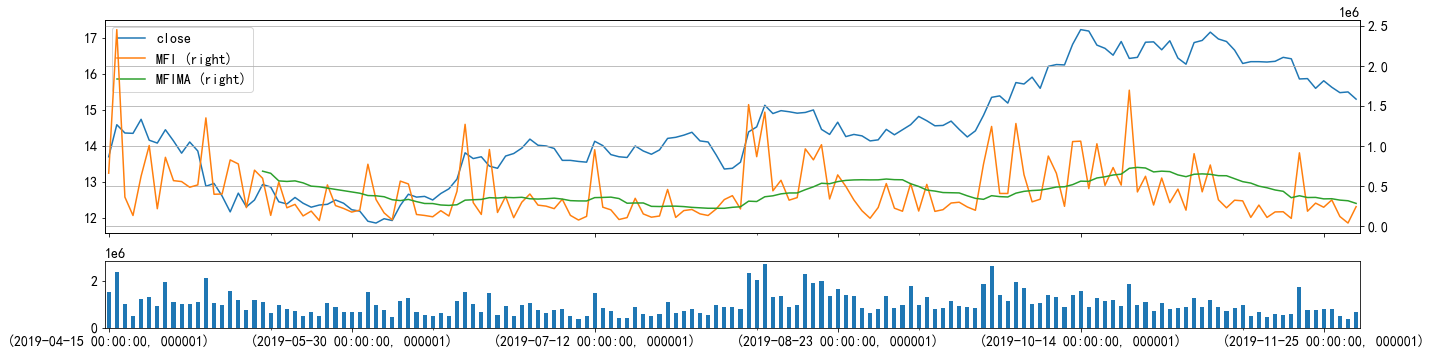

In [122]:
%%time
import sys
import os 
module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path)
import tools.Sample_Tools as smpl
import Analysis_Funs as af
import base.JuUnits as ju
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import talib
data = smpl.get_data(['000001'],end='2019-11-29',gap=154).data

bwmfi =BWMFI(data)
bwmfi.fit()

# plt.show()
fig = plt.figure(figsize=(1620/72,620/72))
ax1= fig.add_subplot(2,1,1)
pd.concat([data.close,bwmfi.ind_df['MFI'],bwmfi.ind_df['MFIMA']],axis=1).plot(secondary_y=['MFI','MFIMA'],ax=ax1)
plt.grid()
ax2= fig.add_subplot(6,1,4,sharex=ax1)
data.volume.plot(kind='bar',ax=ax2)
ax2.tick_params(labelbottom=True)  #  解决share后标签不可见的问题。
ax2.xaxis.set_major_locator(ticker.MaxNLocator(6))




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2021-11-28


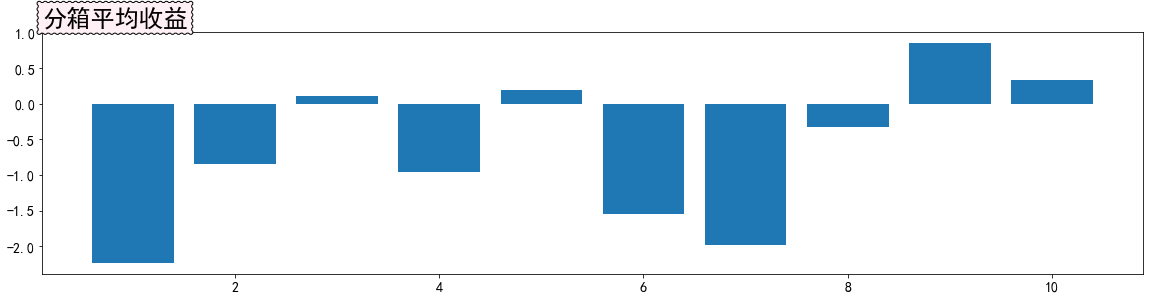

2020-11-28


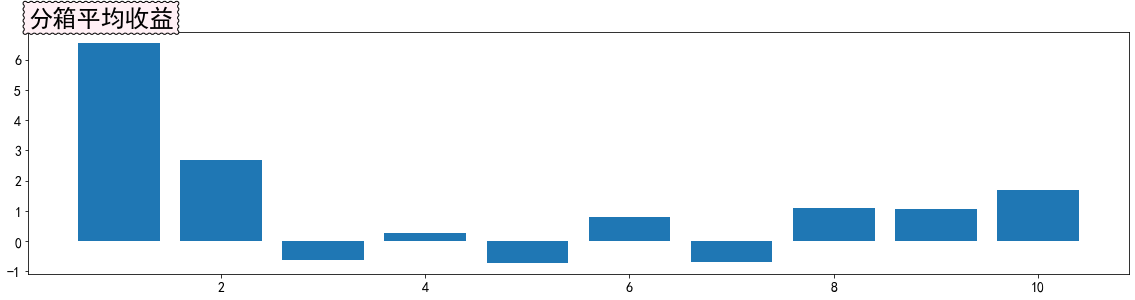

2019-11-28


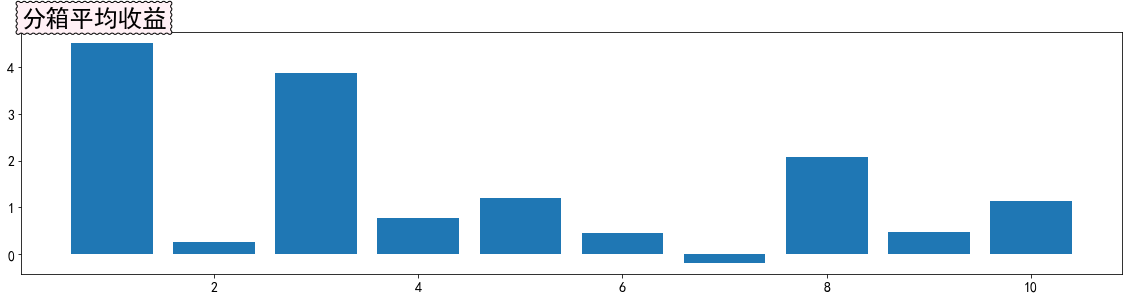

2018-11-28


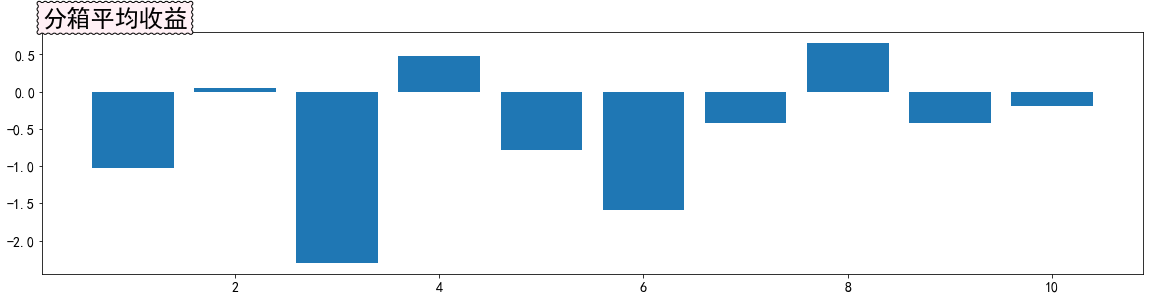

2017-11-28


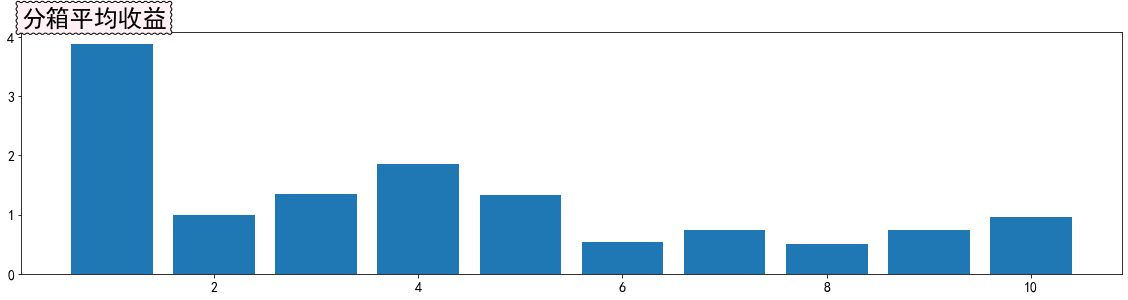

2016-11-28


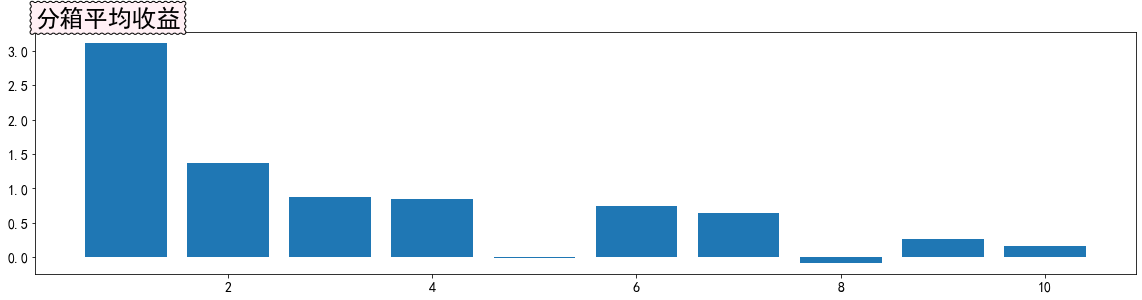

Wall time: 18.2 s


In [168]:
%%time
from tools.Test_Tools import FactorTest

%load_ext autoreload
%autoreload 1
%aimport tools.Test_Tools

dates = ['2021-11-28','2020-11-28','2019-11-28','2018-11-28','2017-11-28','2016-11-28']
# dates = ['2021-11-28']
for date in dates:
    print(date)
    test = FactorTest(SO, sample='上证50', freq="d",end=date, gap=250, only_main=True, neutralize={'enable':False,'static_mv':False},target_field='feature_SO_CONTINUITY_NEG_ABS')
    test.process()
    test.plot(only_binned=True)


2020-11-28


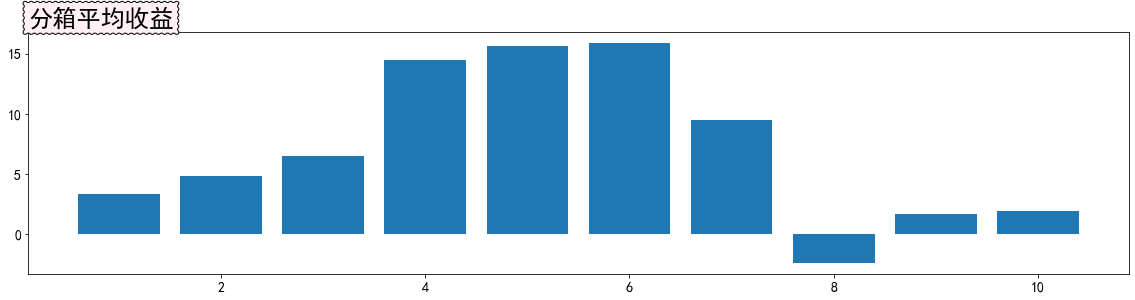

In [105]:
# dates = ['2021-11-28','2020-11-28','2019-11-28','2018-11-28','2017-11-28','2016-11-28']
dates = ['2020-11-28']
for date in dates:
    print(date)
    test = FactorTest(SO, sample='沪深300', freq="d",end=date, gap=250, only_main=True, neutralize={'enable':False,'static_mv':False},target_field='feature_SO_CONTINUITY_NEG_ABS')
    test.process()
    test.plot(only_binned=True)

In [78]:
print(test.ind_ret_df.loc[(slice(None),'000001'),'feature_SO_CONTINUITY_NEG_ABS'].values.tolist())

[-99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, -1, 1, 2, 3, 4, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, 1, -1, 1, -1, 1, 2, -1, -2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1, -2, -3, -4, -5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, -1, -2, 1, 2, 3, -1, -2, -3, -4, -5, 1, -1, 1, 2, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, 1, -1, -2, -3, 1, -1, -2, 1, 2, -1, -2, -3, -4, -5, 1, 2, 3, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, -1, -2, -3, -4, -5, -6, -7, -8, 1, 2, 3, 4, 5, 6, 7, 8, -1, -2, -3, -4, -5, -6, -7, -8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18]
